In [1]:
# KDJ (the random index)
# it is based on the W&R index, which equals to (n high-no.n close)/(n high-n low)
# and based on KD index: stochastic oscillator indicator
# KDJ index adds a J line over KD index
# idea of "Stochastic Volatility"

In [2]:
# RSV: raw stochastic value
# RSV=(no.n close-n low)/(n high-n low) * 100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
GSPC=pd.read_csv('GSPC.csv',index_col='Date')
GSPC=GSPC.iloc[:,1:]
GSPC.index=pd.to_datetime(GSPC.index)
GSPC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09


In [3]:
close=GSPC.Close
high=GSPC.High
low=GSPC.Low

date=close.index.to_series()
ndate=len(date)

In [5]:
periodHigh=pd.Series(np.zeros(ndate-8),\
                  index=date.index[8:])
periodLow=pd.Series(np.zeros(ndate-8),\
                    index=date.index[8:])
RSV=pd.Series(np.zeros(ndate-8),\
               index=date.index[8:])
# compute 9-day RSV
for j in range(8,ndate):
    period=date[j-8:j+1]
    i=date[j]
    periodHigh[i]=high[period].max()
    periodLow[i]=low[period].min()
    RSV[i]=100*(close[i]-periodLow[i])\
           /(periodHigh[i]-periodLow[i])
    periodHigh.name='periodHigh'
    periodLow.name='periodLow'
    RSV.name='RSV'

In [7]:
periodHigh.head(3)

Date
2014-01-14    1845.859985
2014-01-15    1850.839966
2014-01-16    1850.839966
Name: periodHigh, dtype: float64

In [8]:
periodLow.head(3)

Date
2014-01-14    1815.52002
2014-01-15    1815.52002
2014-01-16    1815.52002
Name: periodLow, dtype: float64

In [9]:
RSV.head()

Date
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
2014-01-17    65.628444
2014-01-21    80.068155
Name: RSV, dtype: float64

In [10]:
RSV.describe()

count    326.000000
mean      63.558226
std       31.525472
min        0.000000
25%       37.323359
50%       72.580422
75%       91.854801
max      100.000000
Name: RSV, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11545c710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110075e80>], dtype=object)

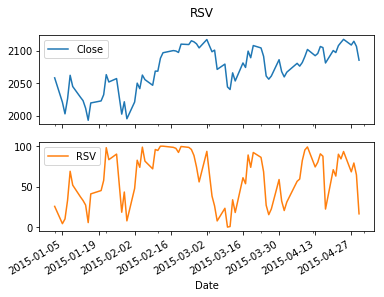

In [11]:
close1=close['2015']
RSV1=RSV['2015']
Cl_RSV=pd.DataFrame([close1,RSV1]).transpose()
Cl_RSV.plot(subplots=True,title='RSV')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


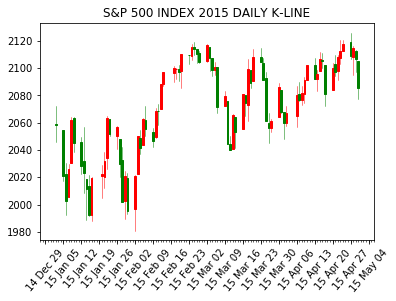

In [12]:
GSPC2015=GSPC['2015']
import candle
candle.candlePlot(GSPC2015,\
                'S&P 500 INDEX 2015 DAILY K-LINE')

In [13]:
# sometimes the RSV remains unchanged so that we can not catch the trend
# fake signals

In [14]:
# we introduce K and D index to fix the problem
# idea of MA 
RSV1=pd.Series([50,50],index=date[6:8]).append(RSV)
RSV1.name='RSV'
RSV1.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
Name: RSV, dtype: float64

In [15]:
# compute K
KValue=pd.Series(0.0,index=RSV1.index)
KValue[0]=50
for i in range(1,len(RSV1)):
    KValue[i]=2/3*KValue[i-1]+RSV1[i]/3
KValue.name='KValue'
KValue.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    58.998036
2014-01-15    70.343759
2014-01-16    75.557638
Name: KValue, dtype: float64

In [16]:
# then use K to find D
DValue=pd.Series(0.0,index=RSV1.index)
DValue[0]=50
for i in range(1,len(RSV1)):
    DValue[i]=2/3*DValue[i-1]+KValue[i]/3
KValue=KValue[1:]
DValue.name='DValue'
DValue=DValue[1:]
DValue.head()

Date
2014-01-13    50.000000
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
Name: DValue, dtype: float64

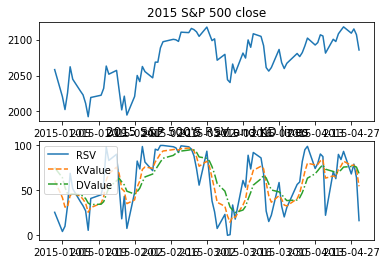

In [17]:
plt.subplot(211)
plt.title('2015 S&P 500 close')
plt.plot(close['2015'])
plt.subplot(212)
plt.title('2015 S&P 500\'S RSV and KD lines')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'],linestyle='dashed')
plt.plot(DValue['2015'],linestyle='-.')
plt.legend(loc='upper left')

In [18]:
# add J line 
JValue=3*KValue-2*DValue
JValue.name='JValue'
JValue.head()

Date
2014-01-13    50.000000
2014-01-14    70.995416
2014-01-15    93.469645
2014-01-16    97.926733
2014-01-17    82.747662
Name: JValue, dtype: float64

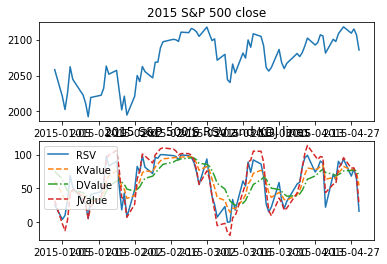

In [19]:
# analysis based on above indexes
plt.subplot(211)
plt.title('2015 S&P 500 close')
plt.plot(close['2015'])
plt.subplot(212)
plt.title('2015 S&P 500\'S RSV and KDJ lines')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'],linestyle='dashed')
plt.plot(DValue['2015'],linestyle='-.')
plt.plot(JValue['2015'],linestyle='--')
plt.legend(loc='upper left')

In [21]:
# KD trading strategy
# K>85, excessive buy, -1
# K<20, excessive sell, 1
# D>80, excessive buy, -1
# D<20, excessive sell, 1
KSignal=KValue.apply(lambda x:-1 if x>85 else 1 if x<20 else 0)
DSignal=DValue.apply(lambda x:-1 if x>80 else 1 if x<20 else 0)
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'
KDSignal[KDSignal>=1]==1
KDSignal[KDSignal<=-1]==-1
KDSignal.head(n=3)

Date
2014-01-13    0
2014-01-14    0
2014-01-15    0
Name: KDSignal, dtype: int64

In [22]:
KDSignal[KDSignal==1].head(n=3)

Date
2014-02-03    1
2014-02-04    1
2014-08-06    1
Name: KDSignal, dtype: int64

In [23]:
def trade(signal,price):
    ret=((price-price.shift(1))/price.shift\
         (1))[1:]
    ret.name='ret'
    signal=signal.shift(1)[1:]
    tradeRet=ret*signal+0
    tradeRet.name='tradeRet'
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)

In [24]:
KDtrade=trade(KDSignal,close)
KDtrade.rename(columns={'ret':'Ret',\
              'tradeRet':'KDtradeRet'},\
               inplace=True)
KDtrade.head()

,Ret,KDtradeRet
Date,,
2014-01-14,0.010818,0.0
2014-01-15,0.005166,0.0
2014-01-16,-0.001347,0.0
2014-01-17,-0.003895,0.0
2014-01-21,0.002774,0.0


In [25]:
# backtesting
import ffn
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))

In [26]:
backtest(KDtrade.Ret,KDtrade.KDtradeRet)

,Ret,KDtradeRet
win rate,0.549080,0.490566
annualized return,0.108128,0.017613
sharpe ratio,0.060163,0.017315
maximum drawdown,-0.074015,-0.097439


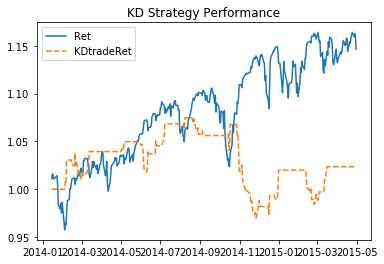

In [27]:
cumRets1=(1+KDtrade).cumprod()
plt.plot(cumRets1.Ret,label='Ret')
plt.plot(cumRets1.KDtradeRet,'--',\
          label='KDtradeRet')
plt.title('KD Strategy Performance')
plt.legend()
# it is bad in the last half part

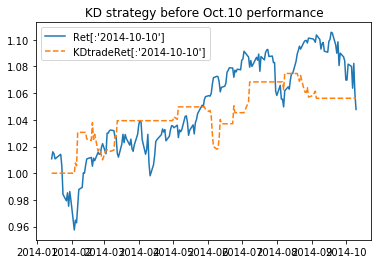

In [28]:
backtest(KDtrade.Ret[:'2014-10-10'],\
          KDtrade.KDtradeRet[:'2014-10-10'])
cumRets2=(1+KDtrade[:'2014-10-10']).cumprod()
plt.plot(cumRets2.Ret,\
          label='''Ret[:'2014-10-10']''')
plt.plot(cumRets2.KDtradeRet,'--',\
          label='''KDtradeRet[:'2014-10-10']''')
plt.title('KD strategy before Oct.10 performance')
plt.legend(loc='upper left')

In [29]:
# KDJ strategy
# J>100, over buy
# J<0, over sell
JSignal=JValue.apply(lambda x:-1 if x>100 else 1 if x<0 else 0)
KDJSignal=KSignal+DSignal+JSignal
KDJSignal=KDJSignal.apply(lambda x:1 if x>=2 else -1 if x<=-2 else 0)

In [30]:
KDJtrade=trade(KDJSignal,close)
KDJtrade.rename(columns={'ret':'Ret',\
             'tradeRet':'KDJtradeRet'},\
             inplace=True)
backtest(KDJtrade.Ret,KDJtrade.KDJtradeRet)

,Ret,KDJtradeRet
win rate,0.549080,0.506024
annualized return,0.108128,0.005666
sharpe ratio,0.060163,0.009630
maximum drawdown,-0.074015,-0.052597


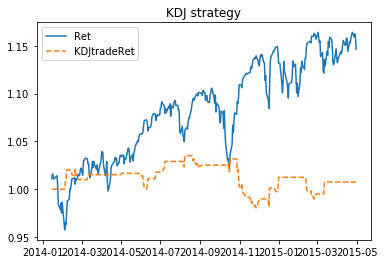

In [31]:
KDJCumRet=(1+KDJtrade).cumprod()
plt.plot(KDJCumRet.Ret,label='Ret')
plt.plot(KDJCumRet.KDJtradeRet,'--',\
          label='KDJtradeRet')
plt.title('KDJ strategy')
plt.legend(loc='upper left')

In [32]:
backtest(KDJtrade.Ret[:'2014-10-10'],\
             KDJtrade.KDJtradeRet[:'2014-10-10'])
# if we just consider the special time period, it is good

,Ret,KDJtradeRet
win rate,0.569149,0.538462
annualized return,0.062719,0.032922
sharpe ratio,0.039369,0.063196
maximum drawdown,-0.057613,-0.020006


In [33]:
# breakthrough of these lines
# KD golden crossing
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,\
                   Line.shift(1)<RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
                     index=Line.index[1:]))

In [34]:
KDupbreak=upbreak(KValue,DValue)*1
KDupbreak[KDupbreak==1].head()

Date
2014-02-06    1
2014-03-04    1
2014-03-20    1
2014-03-31    1
2014-04-16    1
dtype: int64

In [35]:
# KD death crossing
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,\
                   Line.shift(1)>RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
           index=Line.index[1:]))

In [36]:
KDdownbreak=downbreak(KValue,DValue)*1
KDdownbreak[KDdownbreak==1].head()

Date
2014-01-23    1
2014-02-21    1
2014-03-11    1
2014-03-24    1
2014-04-07    1
dtype: int64

In [37]:
close=close['2014-01-14':]
difclose=close.diff()
# change of close prices
prctrend=2*(difclose[1:]>=0)-1
prctrend.head()

Date
2014-01-15    1
2014-01-16   -1
2014-01-17   -1
2014-01-21    1
2014-01-22    1
Name: Close, dtype: int64

In [38]:
# trade signal of golden crossing
# up trend and K upbreak D, we buy 
KDupSig=(KDupbreak[1:]+prctrend)==2
KDupSig.head(n=3)

Date
2014-01-15    False
2014-01-16    False
2014-01-17    False
dtype: bool

In [39]:
# down trend and K downbreak D, we sell
KDdownSig=pd.Series(np.all([KDdownbreak[1:]==1,prctrend==-1],\
                    axis=0),\
                  index=prctrend.index)

breakSig=KDupSig*1+KDdownSig*-1
breakSig.name='breakSig'
breakSig.head()

Date
2014-01-15    0
2014-01-16    0
2014-01-17    0
2014-01-21    0
2014-01-22    0
Name: breakSig, dtype: int64

In [41]:
# break strategy
KDbreak=trade(breakSig,close)
KDbreak.rename(columns={'ret':'Ret',\
              'tradeRet':'KDbreakRet'},\
              inplace=True)
KDbreak.tail()

,Ret,KDbreakRet
Date,,
2015-04-24,0.002253,0.000000
2015-04-27,-0.004141,0.000000
2015-04-28,0.002769,0.000000
2015-04-29,-0.003740,0.000000
2015-04-30,-0.010129,0.010129


In [42]:
backtest(KDbreak.Ret,KDbreak.KDbreakRet)

,Ret,KDbreakRet
win rate,0.546296,0.433962
annualized return,0.095568,-0.024988
sharpe ratio,0.053920,-0.034377
maximum drawdown,-0.074015,-0.086469


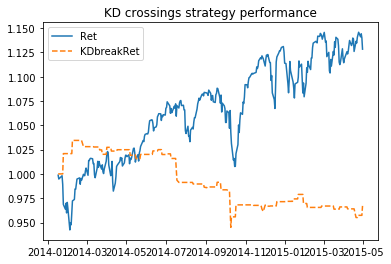

In [43]:
KDbreakRet=(1+KDbreak).cumprod()
plt.plot(KDbreakRet.Ret,label='Ret')
plt.plot(KDbreakRet.KDbreakRet,'--',\
          label='KDbreakRet')
plt.title('KD crossings strategy performance')
plt.legend(loc='upper left')